## Asunciones Regresión Lineal

En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis.

El objetivo de este pairprgramming es que evaluéis si vuestro set de datos cumple todas las asunciones que se deben cumplir para hacer una regresión lineal. Recordamos que estas asunciones son:

>Cada asunción la deberéis testar de forma visual y analítica.

In [1]:
import numpy as np
import pandas as pd
import random 

import matplotlib.pyplot as plt
import seaborn as sns
import sidetable as stb

from scipy import stats
import researchpy as rp
from scipy.stats import levene
from scipy.stats import kstest

plt.rcParams["figure.figsize"] = (10,10) 
pd.options.display.max_columns = None

import sys
sys.path.append("../../")
from src import funciones as fun
from src import variables as var

In [2]:
df = pd.read_pickle('../archivos/coste_vida_limpio.pkl')

In [3]:
df.sample(3)

,country,mcdonalds,cappuccino,milk,rice,eggs,chicken,beef,banana,water,wine,beer,cigarettes_marlboro,public_transport_ticket,taxi,gasoline,basic,internet,gym_monthly,cinema,preschool,primary_school,apt_3beds_outcentre,monthly_salary
3060,North Macedonia,2.55,1.27,0.97,1.22,1.75,5.34,9.00,1.16,0.38,4.24,0.77,2.55,0.459268,0.51,1.15,137.45,11.16,20.37,3.40,25.470000,1528.120000,169.79,169.79
4312,Canada,9.26,3.52,1.73,4.88,4.08,8.94,7.04,2.17,2.28,10.75,3.71,11.12,1.850000,1.84,1.64,96.24,60.53,52.62,8.89,667.656275,10314.807049,1383.48,2816.37
1331,Belgium,8.93,3.31,0.97,1.99,2.60,9.89,14.15,1.75,1.09,6.85,1.92,8.43,2.320000,2.27,1.95,198.46,45.01,25.16,12.64,605.900000,27397.380000,1040.57,2192.42


In [4]:
df['basic'].isnull().sum()

0

In [5]:
df['basic'].describe()

count    4468.000000
mean      136.254584
std        85.048918
min         6.070000
25%        68.780000
50%       128.085000
75%       185.000000
max      1066.670000
Name: basic, dtype: float64

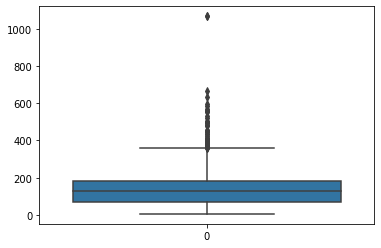

In [6]:
sns.boxplot(df['basic']);

1- Normalidad (ya la deberíais haber evaluado)

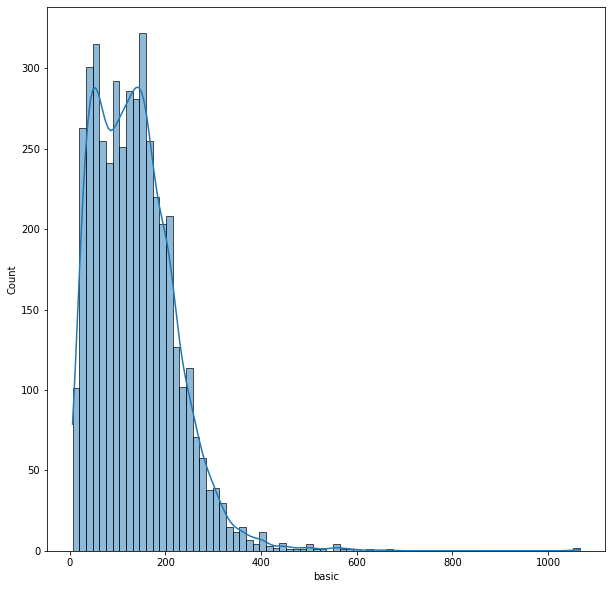

In [20]:
sns.histplot(df['basic'], kde=True);

In [21]:
stats.shapiro(df["basic"])

ShapiroResult(statistic=0.9166607856750488, pvalue=2.802596928649634e-44)

Buscamos una variable que sí cumpla con el criterio de normalidad hasta que aprendamos a normalizar los datos.

In [7]:
numericas = df.select_dtypes(include=np.number)

In [8]:
fun.normalidad(numericas)

['mcdonalds, NO tiene distribución normal -> 1.5466991274404895e-31',
 'cappuccino, NO tiene distribución normal -> 5.151463403354317e-31',
 'milk, NO tiene distribución normal -> 0.0',
 'rice, NO tiene distribución normal -> 0.0',
 'eggs, NO tiene distribución normal -> 6.536721024443834e-40',
 'chicken, NO tiene distribución normal -> 0.0',
 'beef, NO tiene distribución normal -> 0.0',
 'banana, NO tiene distribución normal -> 0.0',
 'water, NO tiene distribución normal -> 0.0',
 'wine, NO tiene distribución normal -> 2.4067301124778733e-41',
 'beer, NO tiene distribución normal -> 3.5494890101347616e-42',
 'cigarettes_marlboro, NO tiene distribución normal -> 0.0',
 'public_transport_ticket, NO tiene distribución normal -> 0.0',
 'taxi, NO tiene distribución normal -> 1.6075695982734301e-41',
 'gasoline, NO tiene distribución normal -> 6.825145665881672e-26',
 'basic, NO tiene distribución normal -> 2.802596928649634e-44',
 'internet, NO tiene distribución normal -> 0.0',
 'gym_mont

No tenemos ninguna variable numércia que cumpla con la normalidad. 

- Si no fuera posible normalizar la variable, en un contexto no educativo dejaríamos de intentar comprobar si se cumplen el resto de asunciones dado que no podríamos seguir adelante con un modelo de **regresión lineal**.

2- Homogeneidad de varianzas

In [9]:
len(numericas.columns)

23

In [10]:
for i, colum in enumerate(numericas.columns): 
    print(i, colum)

0 mcdonalds
1 cappuccino
2 milk
3 rice
4 eggs
5 chicken
6 beef
7 banana
8 water
9 wine
10 beer
11 cigarettes_marlboro
12 public_transport_ticket
13 taxi
14 gasoline
15 basic
16 internet
17 gym_monthly
18 cinema
19 preschool
20 primary_school
21 apt_3beds_outcentre
22 monthly_salary


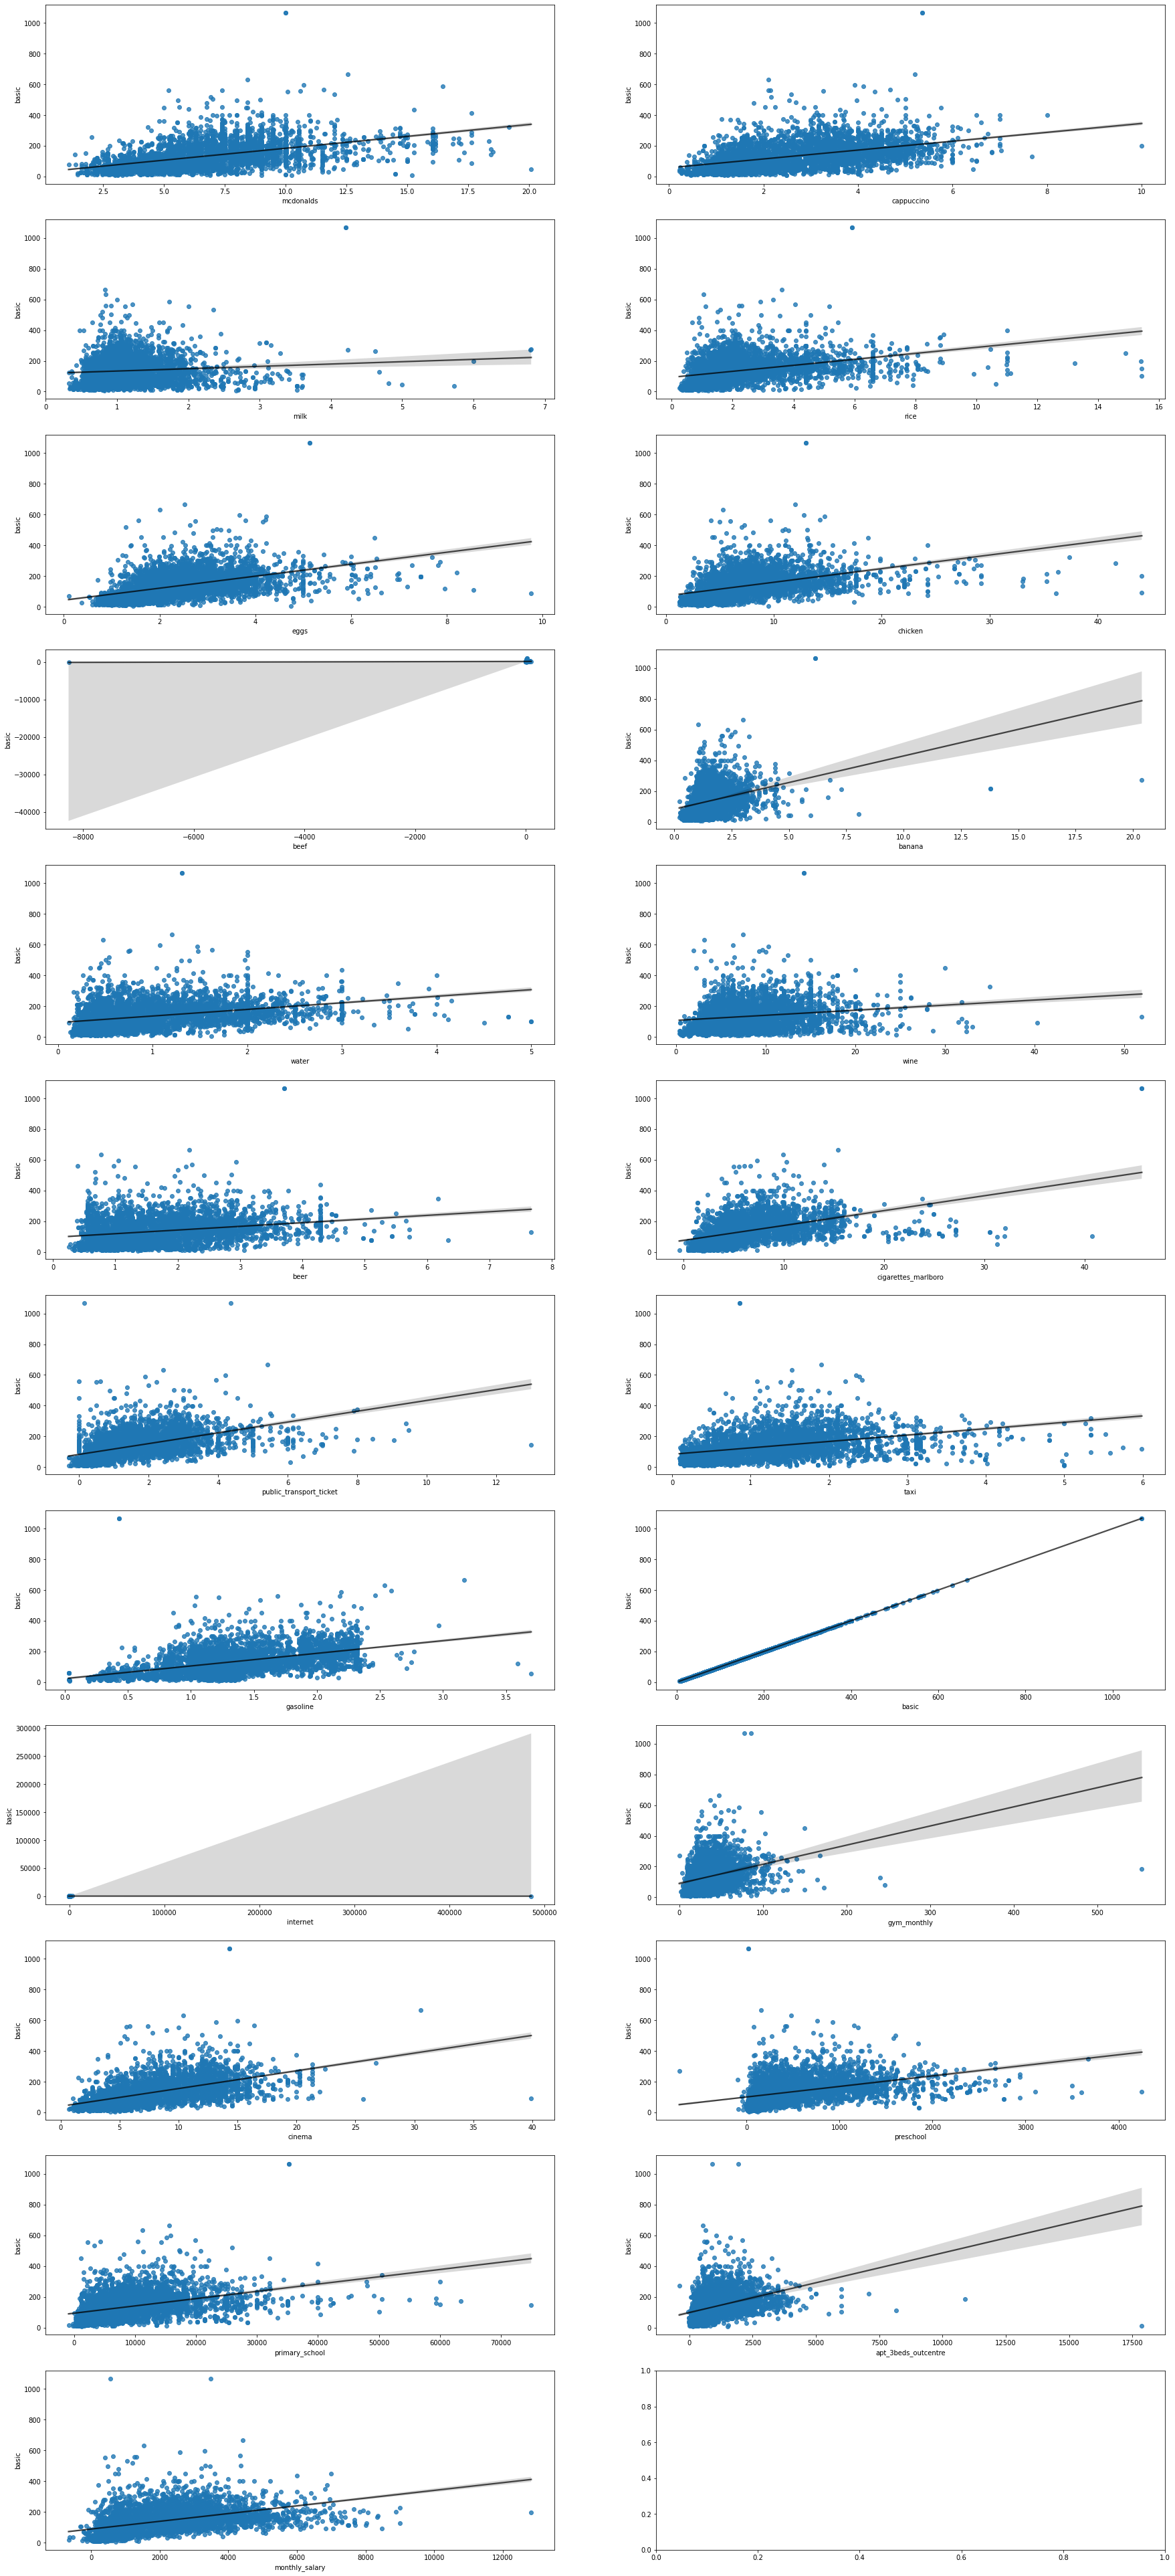

In [11]:
fig, axes = plt.subplots(12,2, figsize = (30, 70))
axes = axes.flat

columnas_numeric = numericas.columns

for i, colum in enumerate(columnas_numeric): 
    sns.regplot(
        data = numericas,
        x = colum,
        y = 'basic',
        line_kws = {"color": "black", "alpha": 0.7 }, 
        ax = axes[i])

Aunque gráficamente ya podemos intuir que nuestras variables predictoras no parecden cumplir con el principio de homogeneidad de varianzas, utilizamos el test de Levene para comprobarlo de manera matemática:

In [36]:
resultados_levene = {}

for col in numericas.columns:
    statistic, p_val = levene(numericas[col], numericas.basic, center='median')
    resultados_levene[col] = p_val

In [37]:
resultados_levene

{'mcdonalds': 0.0,
 'cappuccino': 0.0,
 'milk': 0.0,
 'rice': 0.0,
 'eggs': 0.0,
 'chicken': 0.0,
 'beef': 1.2741179985594701e-176,
 'banana': 0.0,
 'water': 0.0,
 'wine': 0.0,
 'beer': 0.0,
 'cigarettes_marlboro': 0.0,
 'public_transport_ticket': 0.0,
 'taxi': 0.0,
 'gasoline': 0.0,
 'basic': 1.0,
 'internet': 0.5326322680107844,
 'gym_monthly': 0.0,
 'cinema': 0.0,
 'preschool': 0.0,
 'primary_school': 0.0,
 'apt_3beds_outcentre': 0.0,
 'monthly_salary': 0.0}

- La única que cumple criterios es la variable internet.
Con los datos podemos confirmar que nuestras variables predictoras no cumplen con la asunción de homocedasticidad.

3- Independencia de las variables

Hemos estado observando la independencia a lo largo de los jupyter. Si queremos hacer regresión lineal habrá que eliminar alguna variable.

In [12]:
mask = np.triu(np.ones_like(numericas.corr(),dtype = np.bool_))

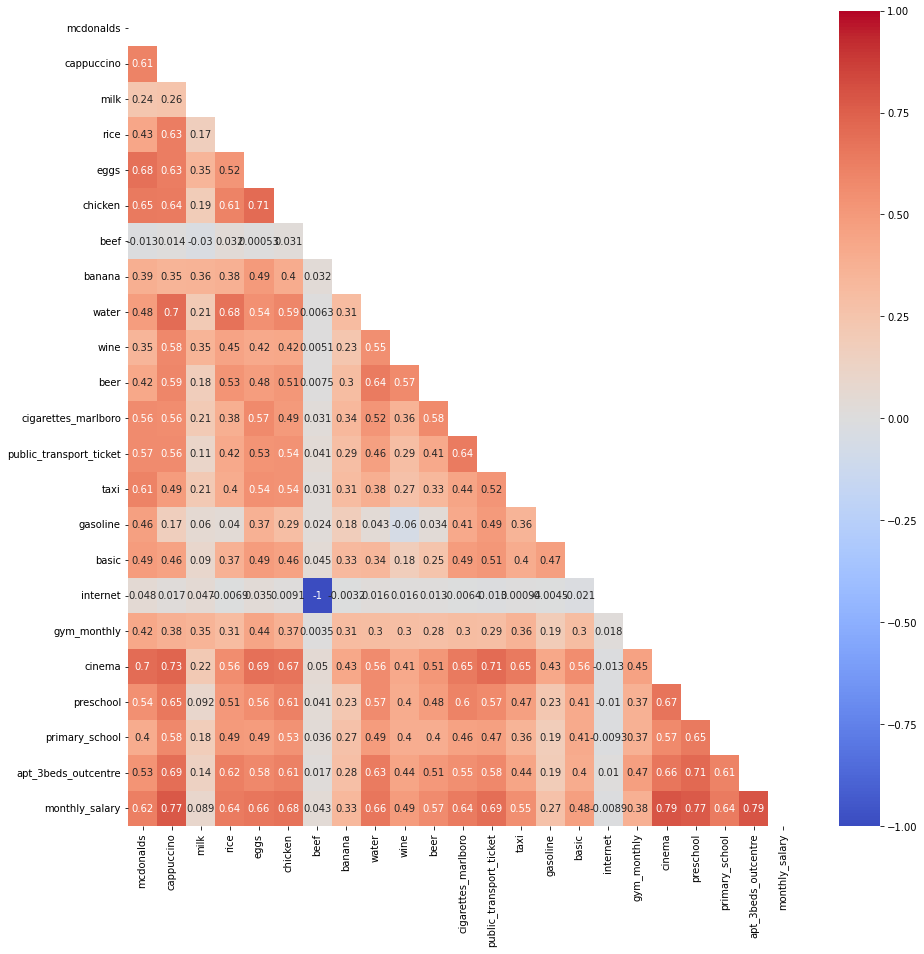

In [13]:
plt.figure(figsize= (15,15))

sns.heatmap(numericas.corr(),
            cmap = 'coolwarm',
            annot = True,
            mask = mask,
            vmin = -1,
            vmax= 1);

Comprobamos que continuamos teniendo variables que no son independientes entre ellas al tener un valor de correlación > 0.7, por lo que para poder realizar un modelo de regresión lineal adecuado tendríamos que descartar algunas de estas variables hasta conseguir que todas fueran independientes entre ellas.